In [ ]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/database/Copy of AirPassengers.csv')

print(data.shape)
data.head()

(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# convert the month column from text to datatime

data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:

data.set_index('Month',inplace=True)

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

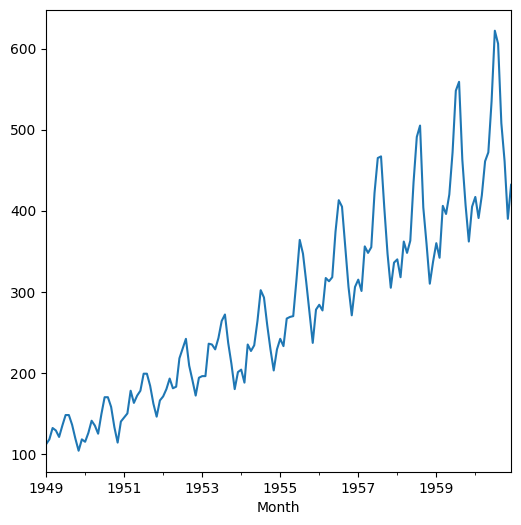

In [ ]:
import matplotlib.pyplot as plt
data['#Passengers'].plot(figsize=(6,6))

Text(0.5, 1.0, 'Residual')

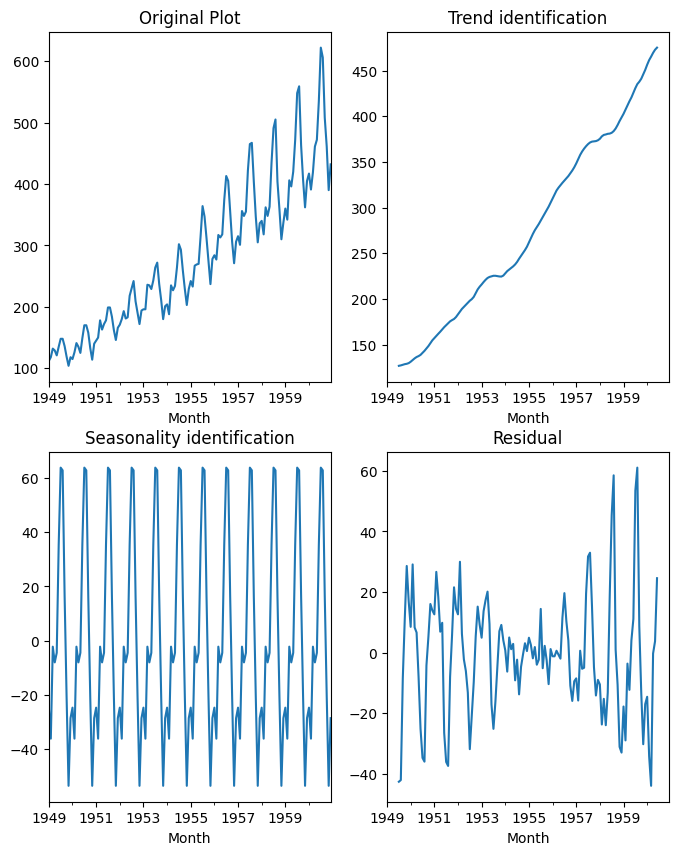

In [ ]:
tempData = data['#Passengers']
OrigData = tempData.copy()

var = seasonal.seasonal_decompose(tempData)
plt.figure(1,(8,10))
plt.subplot(2,2,1)
var.observed.plot()
plt.title('Original Plot')
plt.subplot(2,2,2)
var.trend.plot()
plt.title('Trend identification')

plt.subplot(2,2,3)
var.seasonal.plot()
plt.title('Seasonality identification')

plt.subplot(2,2,4)
var.resid.plot()
plt.title('Residual')


In [ ]:
sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
# train the model
sarima_model = sarima_model.fit()

# forecaste the value
value_for= sarima_model.forecast()
print(value_for)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1961-01-01    449.331718
Freq: MS, dtype: float64


In [ ]:
tempData = data['#Passengers']
num_samples = 24

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

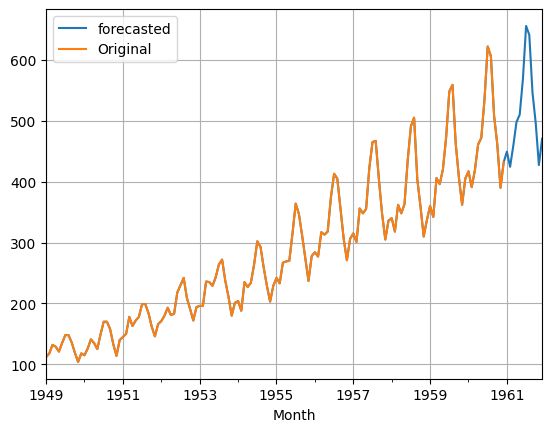

In [ ]:
plt.figure(1)
tempData.plot(label='forecasted')
OrigData.plot(label='Original')
plt.legend()
plt.grid('on')

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

auto_arima(tempData,seasonal=False,m=12,trace=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1550.050, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1535.936, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1530.010, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1548.709, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1528.543, Time=0.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1529.649, Time=0.40 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1529.410, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1527.087, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1528.447, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1534.321, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1507.693, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1528.0

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informati

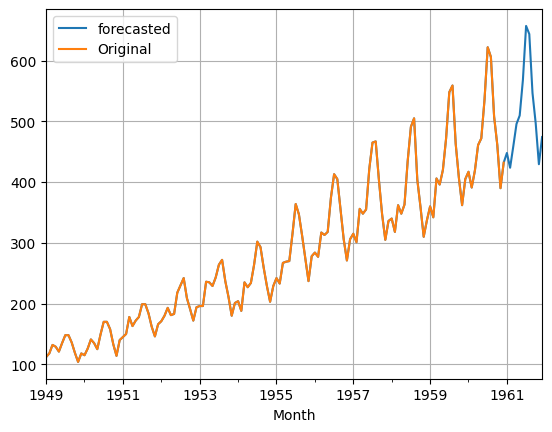

In [ ]:
# i want to forecast the one year data
tempData = data['#Passengers']
num_samples = 12

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(2,1,1),seasonal_order=(2,1,0,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])

plt.figure(1)
tempData.plot(label='forecasted')
OrigData.plot(label='Original')
plt.legend()
plt.grid('on')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informati

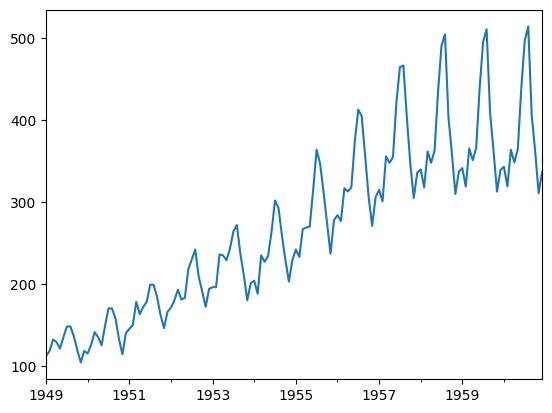

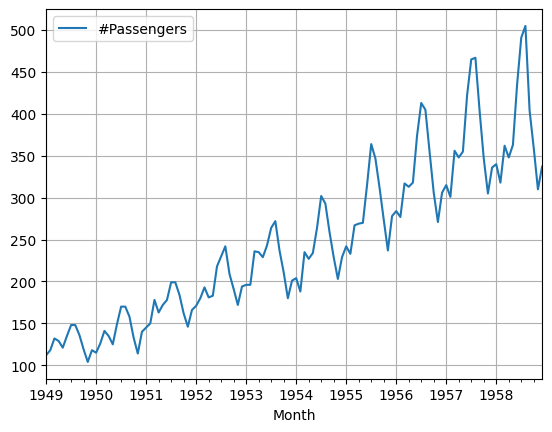

In [ ]:
newData = data.iloc[:-24] # -24 means from the end 24 samples deducted
newData.tail()
# i want to forecast the one year data
tempData = newData['#Passengers']
num_samples = 24

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(2,1,1),seasonal_order=(2,1,0,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])

plt.figure(1)
tempData.plot(label='forecasted')
newData.plot(label='Original')
plt.legend()
plt.grid('on')

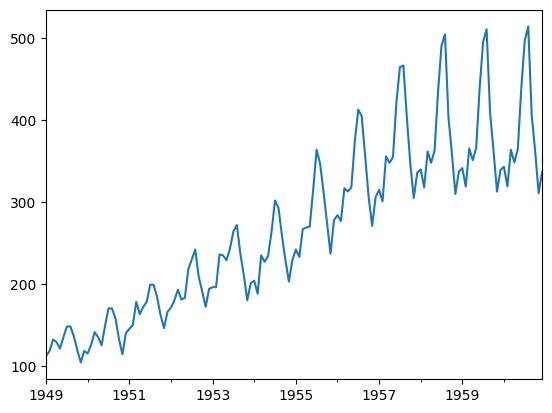

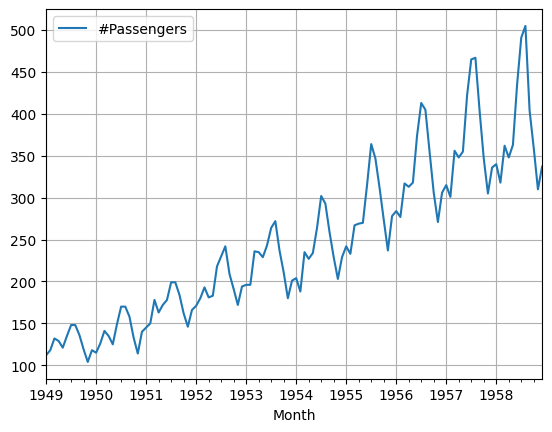

In [ ]:
plt.figure(1)
ax = tempData.plot(label='forecasted')
ax = newData.plot(label='Original')
ax = plt.legend()
plt.grid('on')

In [30]:
path = '/content/drive/MyDrive/database/Copy of milk_production_dataset.csv'
data = pd.read_csv(path)
data.tail()

,Month,Monthly milk production
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,NaN,NaN
169,Monthly milk production: pounds per cow. Jan 6...,NaN


In [34]:
data.dropna(axis=0,inplace=True)
data.tail()

,Month,Monthly milk production
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [35]:
data['Month'] = pd.to_datetime(data['Month'])
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    168 non-null    datetime64[ns]
 1   Monthly milk production  168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


In [37]:
data.set_index('Month',inplace=True)

data.head()

,Monthly milk production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


Text(0.5, 1.0, 'Residual')

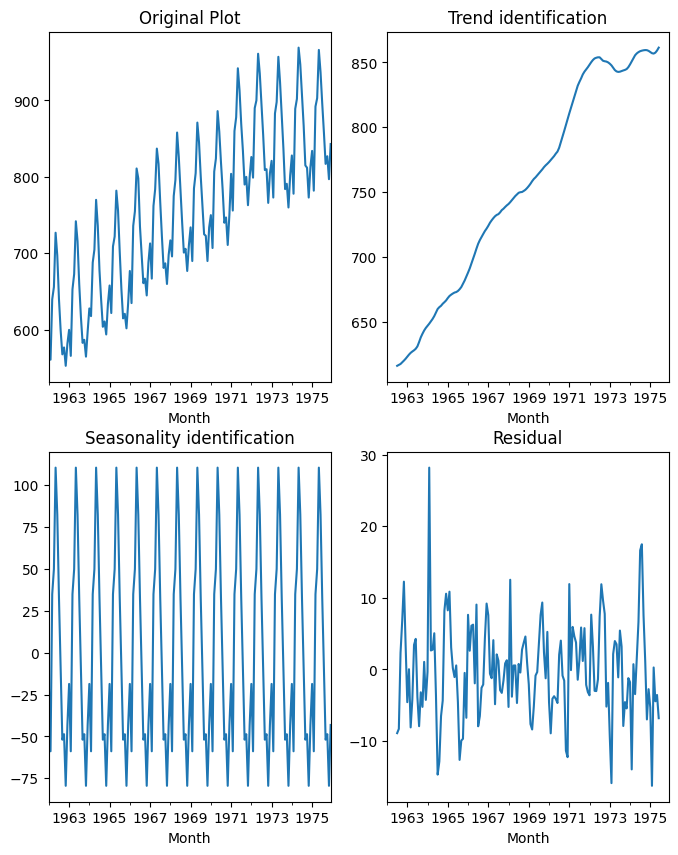

In [38]:
tempData = data['Monthly milk production']
OrigData = tempData.copy()

var = seasonal.seasonal_decompose(tempData)
plt.figure(1,(8,10))
plt.subplot(2,2,1)
var.observed.plot()
plt.title('Original Plot')
plt.subplot(2,2,2)
var.trend.plot()
plt.title('Trend identification')

plt.subplot(2,2,3)
var.seasonal.plot()
plt.title('Seasonality identification')

plt.subplot(2,2,4)
var.resid.plot()
plt.title('Residual')

In [39]:

sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
# train the model
sarima_model = sarima_model.fit()

# forecaste the value
value_for= sarima_model.forecast()
print(value_for)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1976-01-01    865.174112
Freq: MS, dtype: float64


In [41]:
# i want to forecast the one year data
tempData = data['Monthly milk production']
num_samples = 12

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

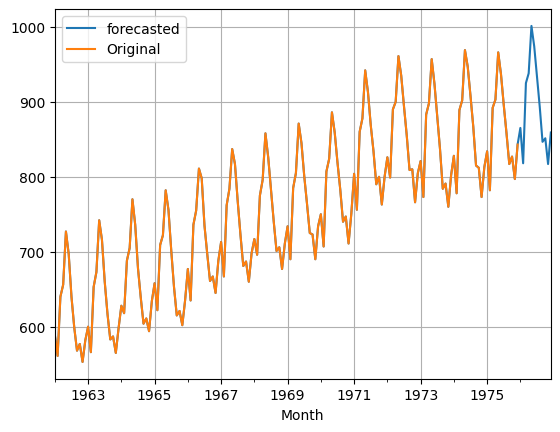

In [42]:
plt.figure(1)
tempData.plot(label='forecasted')
OrigData.plot(label='Original')
plt.legend()
plt.grid('on')